# Exploring Personal Fitness Level Using the Apple Watch Data

## A Look at Distance, Pace, Predicted VO<sub>2</sub> max and Resting Heart Rate

I like to run. I gauge my fitness level through running. 

For several years after running my first and only marathon, I rarely run. My fitness level went south. In 2018, I got an Apple Watch to check out its health features. It took me a few months to learn to use the Apple Watch activity features regularly. The Apple Watch and iPhone's Activity/Fitness App have been very helpful in getting me back into shape. They also made running more fun (all that data!). It took almost 22 months to get back to running shape.

Prior to running with the Apple Watch, I used running distance and pace to track my fitness level. With the Apple Watch, I am starting to learn to look at the predicted VO2 Max and resting heart rate as measures of my fitness level. This data story is my first stab at looking at different activity and health dimensions to help see how I improved my fitness level over a period of time.

## Setup

In [1]:
import pathlib

In [2]:
import pandas as pd

In [3]:
home = pathlib.Path.home()

In [4]:
study_path = f"{home}/small-data/study/apple-watch-health-tracking/story-data"

In [5]:
runs = pd.read_csv(f"{study_path}/apple-watch-runs-summary-study.csv",parse_dates=['date'])

## Runs Spanning 23 Months

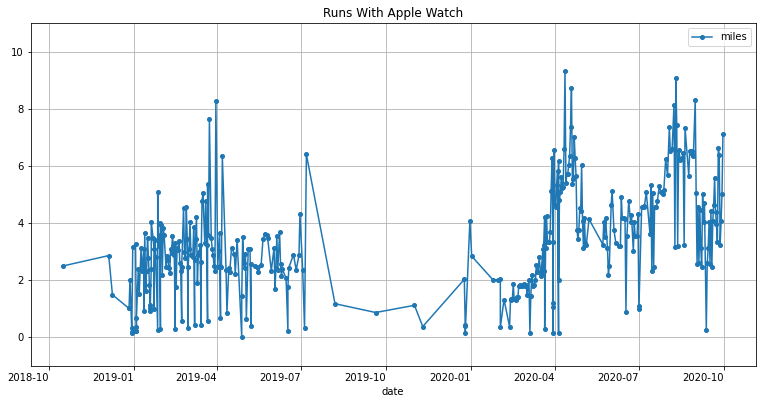

In [27]:
runs_lp = runs.plot.line(
    title="Runs With Apple Watch",
    y=["miles"],
    x="date",
    figsize=(13, 7),
    markevery=1, markersize=8, style='.-',
    rot=0, grid=True,
    ylim=[-1, 11])

The journey back to running shape went through ups and downs. Running consistency improved in 2020.

## Annual Run Miles

In [7]:
runstats = runs.groupby(by=runs['year']).sum()

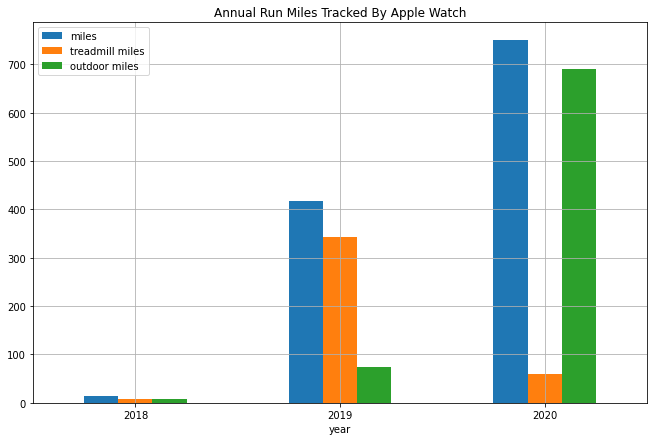

In [28]:
runstats_bp = runstats.plot.bar(y=['miles', 'treadmill miles', 'outdoor miles'], 
                                title='Annual Run Miles Tracked By Apple Watch', 
                                figsize=(11, 7), rot=0, grid=True)

In [9]:
runstats_bp.get_figure().savefig(f"{study_path}/annual_run_miles")

### Annual Minimum 5K Runs

I have gone through many periods of getting out of running shape, even before I had the Apple Watch. I always seem to use running a 5K as my fitness test. The first thing to do is to run 5K no matter how slow the run is. Once I am able to run a 5K, then I focus on improving my 5K speed.

In [10]:
runs_5k_min = runs.loc[runs['miles'] >= 3.10]

In [11]:
runs_5k_min_by_year = runs_5k_min.groupby('year').count()

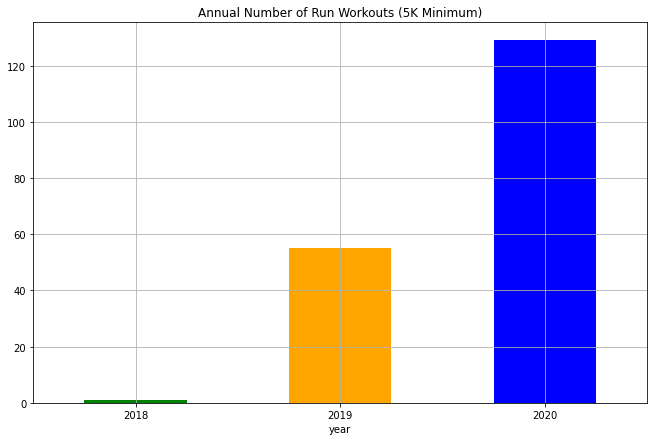

In [29]:
runstats_5k_min_bp = runs_5k_min_by_year.plot.bar(
    y='miles', legend=False, 
    title='Annual Number of Run Workouts (5K Minimum)',
    color=["green", "orange", "blue"],
    figsize=(11, 7), rot=0, 
    grid=True)

In [13]:
runstats_5k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_5k_min")

## Annual Minimum 10K Runs

While looking at the data generated by the Apple Watch, I began thinking about making the 10K the new metric for determining my running fitness level. 

In [14]:
runs_10k_min = runs.loc[runs['miles'] >= 6.20]

In [15]:
runs_10k_min_by_year = runs_10k_min.groupby('year').count()

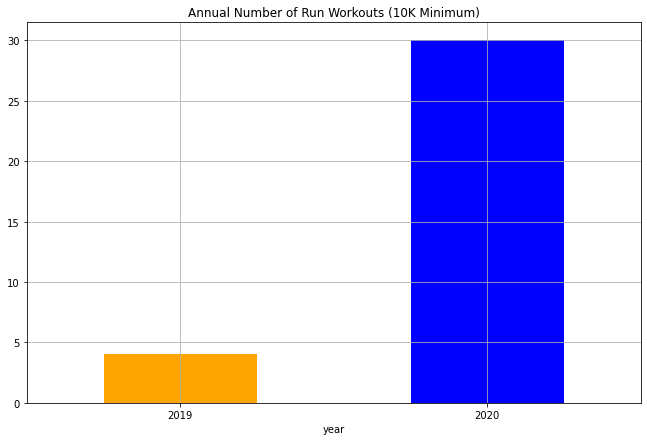

In [30]:
runstats_10k_min_bp = runs_10k_min_by_year.plot.bar(
    y='miles', color=['orange', 'blue'], 
    legend=False, 
    title='Annual Number of Run Workouts (10K Minimum)', 
    rot=0, grid=True,
    figsize=(11, 7))

In [17]:
runstats_10k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_10k_min")

## 2020 Monthly Fitness Level

I usually use the treadmill to get me back to running shape. The treadmill allows me to set the running pace. In the year of Covid, without the use of a gym, the treadmill became an unnecessary tool. I use the last 15 days of March 2020 to calculate my baseline fitness level, aka, poor fitness level. 2020 is the year of outdoor runs.

In [18]:
monthly_pace = pd.read_csv(f"{study_path}/fitness-month-pace.csv")

### Miles per Month

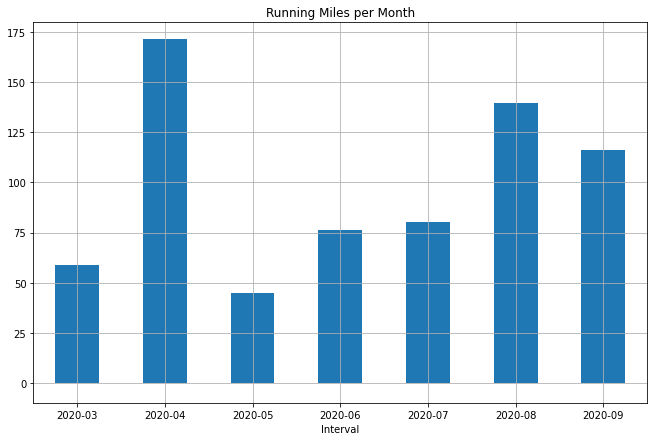

In [31]:
monthly_miles_bp = monthly_pace.plot.bar(
    title="Running Miles per Month",
    x="Interval", 
    y=["Distance"], 
    legend=False,
    ylim=[-10, 180], grid=True,
    figsize=(11, 7), rot=0,
)

Notes:

1. April was a case of too much too soon. It began as a simple "Run 30 straight days of 5K" on March 26 and it became   41 consecutive days of running, 221 miles, 5.39 miles/day. It was a very bad idea.

2. Two weeks of no running in May and the runs involved very short distances.

### Monthly Changes in Running Pace

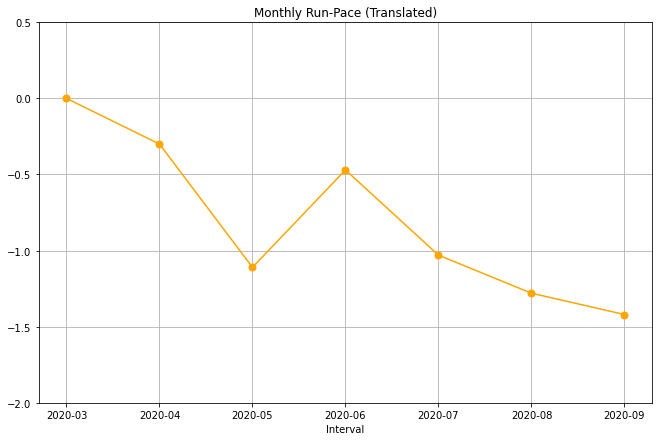

In [20]:
monthly_runs_pace_bp = monthly_pace.plot.line(
    title="Monthly Run-Pace (Translated)",
    x="Interval", 
    y=["Translated Pace"], 
    ylim=[-2, 0.5],
    figsize=(11, 7), rot=0,
    color="orange",
    legend=False,
    grid=True,
    markevery=1, markersize=14, style='.-',
)

Using March as baseline, my running pace improved over time. May's fast running pace is an outlier. I ran very short distances and less frequently. The short runs became my "fast" running tests.

### Runs Started To Feel Good in August

In early September, I told a runner-friend that running felt good in August. I attributed it to weight loss. I was a lot lighter in August 2020 than when I ran my marathon many years ago. While weight is a huge contributing factor, I got curious about my VO<sub>2</sub> max numbers, as predicted by the Apple Watch. VO<sub>2</sub> max is the maximum amount of oxygen the body can use during exercise.

In [21]:
monthly_runs_pace_bp.get_figure().savefig(f"{study_path}/monthly_pacechange_2020")

In [22]:
fca = pd.read_csv(f"{study_path}/fitness-combined-average-for-story.csv")

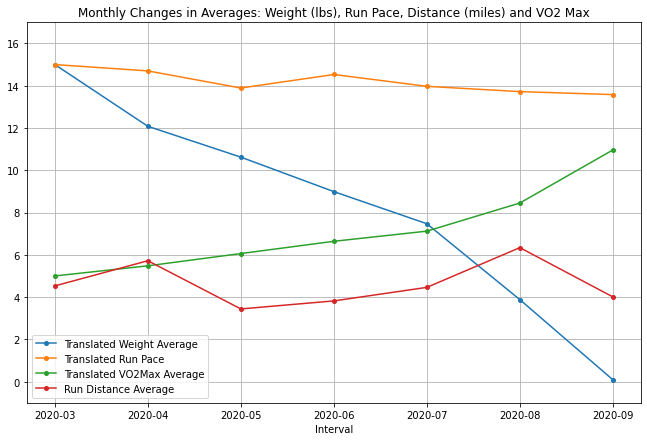

In [25]:
monthly_wpdv = fca.plot.line(
    title='Monthly Changes in Averages: Weight (lbs), Run Pace, Distance (miles) and VO2 Max',
    x='Interval', 
    y=['Translated Weight Average', 'Translated Run Pace', 
       'Translated VO2Max Average', 'Run Distance Average'],
    figsize=(11, 7),
    ylim=(-1, 17),
    markevery=1, markersize=8, style='.-', 
    grid=True)

Except for the Run Distance Average, the values for the other three dimensions are translated. I use 15 as the March baseline for weight and pace. Both dimensions decreased over time.

In August, I averaged over 6 miles per run. I can't explain why I felt good running, but I seemed to have hit a sweet spot for the weight-VO<sub>2</sub> max combination.

Note: I cast a wary eye on the September VO<sub>2</sub> max numbers. For four straight days, after installing the Watch OS 7 software on September 18, the VO<sub>2</sub> max climbed very fast and stayed at the higher numbers. Prior to the Watch OS 7, I had six months of daily steady and miniscule linear growth. 

### Nice Side Effect of Better Fitness Level: Lower Resting Heart Rate

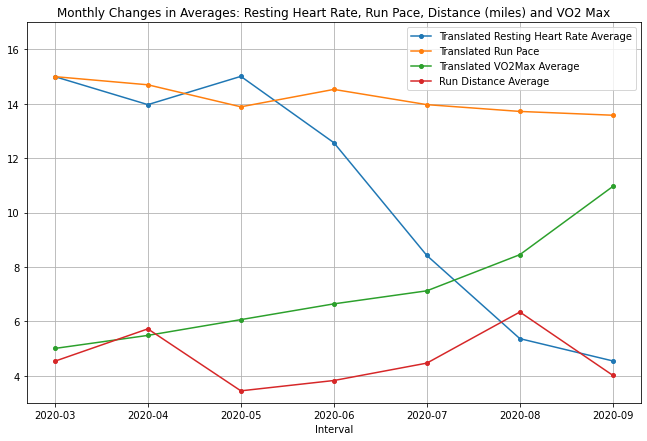

In [26]:
rhh_lp = fca.plot.line(
    title='Monthly Changes in Averages: Resting Heart Rate, Run Pace, Distance (miles) and VO2 Max',
    x='Interval', 
    y=['Translated Resting Heart Rate Average', 'Translated Run Pace', 
       'Translated VO2Max Average', 'Run Distance Average'],
    figsize=(11, 7),
    ylim=(3, 17),
    markevery=1, markersize=8, style='.-', 
    grid=True)